# Using `icepyx` to access Icesat-2 data

## What is Icesat-2?

![IS2](https://icesat-2.gsfc.nasa.gov/sites/default/files/MissionLogo_0.png)

Icesat-2 is a satellite lidar instrument. Lidar is an active remote sensing instrument in which pulses of light are emitted and the return time is used to mesure distance. The available Icesat-2 data products range from sea ice freeboard to land elevation to cloud backscatter characteristics. A list of availble products can be found [here](https://icesat-2.gsfc.nasa.gov/science/data-products). In this tutorial we will look at `ATL08` Land Water Vegetation Elevation.

### Data Collection

Icesat-2 measures data along 6 different beams: 3 strong beams and 3 weak beams. The strong and weak beams are calibrated such that the weak beams have more sensitivity to viewing very bright surfaces (Ex. ice), which the strong beams are able to view surfaces with lower reflectances (Ex. water). The beams are called `gt1l`, `gt1r`, `gt2l`, `gt2r`, `gt3l`, and `gt3r`, where the `l` and `r` denotes whether the beam was strong or weak.

![Tracks](https://ars.els-cdn.com/content/image/1-s2.0-S0034425718305066-gr1.jpg)

Photo: Neuenschwander et. al. 2019, Remote Sens. Env. [DOI](https://doi.org/10.1016/j.rse.2018.11.005)

## What is `icepyx`?

<img src="https://icepyx.readthedocs.io/en/latest/_static/icepyx_v2_oval_orig_nobackgr.png" width=350/>

icepyx is a community built library for searching, downloading, and reading Icesat-2 data. While opening data should be straightforward, there are some oddities in navigating the organization of the Icesat-2 data. icepyx provides tools to help with those oddities.

### Fitting icepyx into the data access package landscape

For Icesat-2 data, the icepyx package can:
- search for available data granules (data files)
- order and download data
- order a subset of data: either clipped in space or containing fewer variables
- provides functionality to search through the available data variables
- read Icesat-2 data into xarray DataArrays, including merging data from multiple files

### Using icepyx to search for data

We won't dive into using icepyx to search for and download data in this tutorial, since we already discussed how to do that with `earthaccess`. The code to search and download is still provided below for the curious reader. The [icepyx documentation](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_access.html) shows more detail about different search parameters and how to inspect the results of a query.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
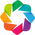

In [1]:
import icepyx as ipx

In [ ]:
short_name = 'ATL08'
spatial_extent = [-99.8, 21, -99.0, 21.7]
date_range = ['2019-06-11','2019-06-11']
region = ipx.Query(short_name, spatial_extent, date_range)

In [ ]:
# region.avail_granules(ids=True)

In [ ]:
# Download the granules to a into a folder called 'download'
region.download_granules('./downloads_ATL08')

<div class="alert alert-block alert-info">
<b>Tip:</b> If you don't want to type your earthdata login information everytime it is
    required there are alternate methods for authenticating. Two common methods
    are 1) Add your earthdata password and username to as environment variables
    as `EARTHDATA_LOGIN` and `EARTHDATA_PASSWORD`. 2) setup a `.netrc` file in your home directory. See: https://nasa-openscapes.github.io/2021-Cloud-Hackathon/tutorials/04_NASA_Earthdata_Authentication.html </div>

## Reading a file with icepyx

To read a file with icepyx there are several steps:
1. Create a `Read` object. This sets up an initial connection to your file(s) and validates the metadata.
2. Tell the `Read` object what variables you would like to read
3. Load your data!

### Create a `Read` object

In [2]:
pattern = "processed_ATL{product:2}_{datetime:%Y%m%d%H%M%S}_{rgt:4}{cycle:2}{orbitsegment:2}_{version:3}_{revision:2}.h5"
reader = ipx.Read('./downloads_ATL08', "ATL08", pattern)

You have 1 files matching the filename pattern to be read in.


In [3]:
reader

### Select your variables

One key feature of icepyx is the ability to browse the variables available in the dataset. There are typically hundreds of variables in a single dataset, so that is a lot to sort through! Let's take a moment to get oriented to the organization of an ATL08 file.

_TODO: loose file structure for ATL08_

We see lots of variables availble. Another way to visualize these structure is to download one file and open it using https://myhdf5.hdfgroup.org/. 

These different groups are related to the ATL08 algorithm.

<img src=".images/ATL08_photon_classification_example.jpg" width=450/>

> _Fig. 4. An example of the classified photons produced from the ATL08 algorithm. Ground photons (red dots) are labeled as all photons falling within a point spread function distance of the estimated ground surface. The top of canopy photons (green dots) are photons that fall within a buffer distance from the upper canopy surface, and the photons that lie between the top of canopy surface and ground surface are labeled as canopy photons (blue dots)._ (Neuenschwander & Pitts, 2019)

In [5]:
reader.vars.avail()

['ancillary_data/atlas_sdp_gps_epoch',
 'ancillary_data/control',
 'ancillary_data/data_end_utc',
 'ancillary_data/data_start_utc',
 'ancillary_data/end_cycle',
 'ancillary_data/end_delta_time',
 'ancillary_data/end_geoseg',
 'ancillary_data/end_gpssow',
 'ancillary_data/end_gpsweek',
 'ancillary_data/end_orbit',
 'ancillary_data/end_region',
 'ancillary_data/end_rgt',
 'ancillary_data/granule_end_utc',
 'ancillary_data/granule_start_utc',
 'ancillary_data/land/atl08_region',
 'ancillary_data/land/bin_size_h',
 'ancillary_data/land/bin_size_n',
 'ancillary_data/land/bright_thresh',
 'ancillary_data/land/ca_class',
 'ancillary_data/land/can_noise_thresh',
 'ancillary_data/land/can_stat_thresh',
 'ancillary_data/land/canopy20m_thresh',
 'ancillary_data/land/canopy_flag_switch',
 'ancillary_data/land/canopy_seg',
 'ancillary_data/land/class_thresh',
 'ancillary_data/land/cloud_filter_switch',
 'ancillary_data/land/del_amp',
 'ancillary_data/land/del_mu',
 'ancillary_data/land/del_sigma',


In [6]:
reader.vars.append(var_list=['h_canopy', 'latitude', 'longitude'])

### Load the data!

In [ ]:
ds = reader.load()
ds

Here we have an xarray Dataset, a common Python data structure for analysis. To visualize the data we can plot it using:

In [ ]:
ds.plot.scatter(x="longitude", y="latitude", hue="h_canopy")

Notice that the data is already subset to our area of interest! (Also download the full granule with earthaccess to compare the area?)

## Using icepyx to download a subset of a granule

One feature which is not yet available in earthaccess is the ability to download just a subset of the file. This could mean a smaller spatial area or fewer variables. This feature is available in icepyx.

We saw above that icepyx by default will subset your data to the bounding box you provided when downloading. If you know in advance which variables you want icepyx can also subset variables.

### Subset variables

In [ ]:
# Create our Query
short_name = 'ATL08'
spatial_extent = [-99.8, 21, -99.0, 21.7]
date_range = ['2019-06-11','2019-06-11']
region = ipx.Query(short_name, spatial_extent, date_range)

In [ ]:
# Specify desired variables
region.order_vars.append(var_list=['h_canopy', 'latitude', 'longitude'])

In [ ]:
# Download the granules, using the Coverage kwarg to specify variables
region.download_granules(path='./subset_ATL08', Coverage=region.order_vars.wanted)

In [ ]:
# Read the new data
pattern = "processed_ATL{product:2}_{datetime:%Y%m%d%H%M%S}_{rgt:4}{cycle:2}{orbitsegment:2}_{version:3}_{revision:2}.h5"
reader = ipx.Read('./downloads_ATL08', "ATL08", pattern)

The available variables list on the subset dataset is a lot shorter!

In [ ]:
reader.vars.avail()

## Final fun thing

folium map? hvplot?

In [ ]:
import folium

In [ ]:
m = folium.Map(location=(21.3, -99.4), zoom_start=9)

In [ ]:
m

Idea: recreate the plot from the paper?

Should we trust openaltimetry? API seems unreliable.

In [ ]:
cyclemap, rgtmap = region.visualize_elevation()

In [ ]:
cyclemap

In [ ]:
rgtmap